In [94]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
# from google.colab import files
# myfile = files.upload()

In [73]:
# import io
# import pandas as pd

In [74]:
# df = pd.read_csv(io.BytesIO(myfile['test_swmotorcycle_False.csv']))
# df.head()# 

In [123]:
import pandas as pd
df = pd.read_csv('./csv/test_swmotorcycle_False.csv')
df["Frequency"] = df["ClaimNb"] / df["Exposure"]


In [124]:
noobsdf=df[(df['Exposure']==0)]
noobsdf

,OwnerAge,Gender,Area,RiskClass,VehAge,BonusClass,Exposure,ClaimNb,ClaimAmount,Frequency
1,4,Male,Lesser towns except Gotland; Northern towns,EV ratio 20-24,9,BM1,0.0,0,0,NaN
6,9,Female,Small towns; countryside except Gotland; North...,EV ratio 9-12,6,BM1,0.0,0,0,NaN
19,13,Male,Small towns; countryside except Gotland; North...,EV ratio 16-19,18,BM1,0.0,0,0,NaN
34,15,Male,Lesser towns except Gotland; Northern towns,EV ratio 6-8,10,BM1,0.0,0,0,NaN
37,15,Male,Small towns; countryside except Gotland; North...,EV ratio 6-8,4,BM1,0.0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
64453,79,Female,Small towns; countryside except Gotland; North...,EV ratio 13-15,8,BM4,0.0,0,0,NaN
64485,80,Male,Small towns; countryside except Gotland; North...,EV ratio 6-8,6,BM4,0.0,0,0,NaN
64517,83,Female,Small towns; countryside except Gotland; North...,EV ratio 9-12,12,BM1,0.0,0,0,NaN
64538,85,Male,Small towns; countryside except Gotland; North...,EV ratio 13-15,7,BM3,0.0,0,0,NaN


In [130]:
noobsdf2 = noobsdf.to_numpy()

In [131]:
x_new=noobsdf2
x_new=x_new.reshape(row,col)
y_new=model.predict(x_new)

NameError: name 'row' is not defined

In [108]:
# noobsdf = noobsdf.replace([np.inf, -np.inf], np.nan)

In [109]:
# noobsdf.fillna(1,inplace=True)

In [117]:
# print(
#     "Average Frequency = {}".format(np.average(noobsdf["Frequency"], weights=noobsdf["Exposure"]))
# )

print(
    "Fraction of exposure with zero claims = {0:.1%}".format(
        noobsdf.loc[noobsdf["ClaimNb"] == 0, "Exposure"].sum() / noobsdf["Exposure"].sum()
    )
)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(16, 4))
ax0.set_title("Number of claims")
_ = noobsdf["ClaimNb"].hist(bins=30, log=True, ax=ax0)
ax1.set_title("Exposure in years")
_ = noobsdf["Exposure"].hist(bins=30, log=True, ax=ax1)
 ax2.set_title("Frequency (number of claims per year)")
 _ = noobsdf["Frequency"].hist(bins=30, log=True, ax=ax2)

IndentationError: unexpected indent (2613888269.py, line 16)

In [111]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer


log_scale_transformer = make_pipeline(
    FunctionTransformer(np.log, validate=False), StandardScaler()
)

m2 = {
    "BM1" : 1,
    "BM2" : 2,
    "BM3" : 3,
    "BM4" : 4,
    "BM5" : 5,
    "BM6" : 6,
    "BM7" : 7
}

noobsdf['BonusClass'] = noobsdf['BonusClass'].map(m2)



In [112]:
linear_model_preprocessor = ColumnTransformer(
    [
        ("passthrough_numeric", "passthrough", ["BonusClass"]),
        (
            "binned_numeric",
            KBinsDiscretizer(n_bins=10),
            ["VehAge", "OwnerAge"],
        ),
        (
            "onehot_categorical",
            OneHotEncoder(),
           ["Gender", "RiskClass","Area"]
        ),
    ],
    remainder="drop",
)

In [113]:
noobsdf.isna().sum()

OwnerAge       0
Gender         0
Area           0
RiskClass      0
VehAge         0
BonusClass     0
Exposure       0
ClaimNb        0
ClaimAmount    0
Frequency      0
dtype: int64

In [115]:
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

nb_train, nb_test = train_test_split(noobsdf, test_size=1, random_state=0)

dummy = Pipeline(
    [
        ("preprocessor", linear_model_preprocessor),
        ("regressor", DummyRegressor(strategy="mean")),
    ]
).fit(nb_train, nb_train["Frequency"], regressor__sample_weight=nb_train["Exposure"])

ZeroDivisionError: Weights sum to zero, can't be normalized

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_poisson_deviance


def score_estimator(estimator, nb_test):
    """Score an estimator on the test set."""
    y_pred = estimator.predict(nb_test)

    print(
        "MSE: %.3f"
        % mean_squared_error(
            nb_test["Frequency"], y_pred, sample_weight=nb_test["Exposure"]
        )
    )
    print(
        "MAE: %.3f"
        % mean_absolute_error(
            nb_test["Frequency"], y_pred, sample_weight=nb_test["Exposure"]
        )
    )

    # Ignore non-positive predictions, as they are invalid for
    # the Poisson deviance.
    mask = y_pred > 0
    if (~mask).any():
        n_masked, n_samples = (~mask).sum(), mask.shape[0]
        print(
            "WARNING: Estimator yields invalid, non-positive predictions "
            f" for {n_masked} samples out of {n_samples}. These predictions "
            "are ignored when computing the Poisson deviance."
        )

    print(
        "mean Poisson deviance: %.3f"
        % mean_poisson_deviance(
            nb_test["Frequency"][mask],
            y_pred[mask],
            sample_weight=nb_test["Exposure"][mask],
        )
    )


print("Constant mean frequency evaluation:")
score_estimator(dummy, nb_test)

Constant mean frequency evaluation:
MSE: 0.000
MAE: 0.011
mean Poisson deviance: 0.021


In [ ]:
from sklearn.linear_model import Ridge


ridge_glm = Pipeline(
    [
        ("preprocessor", linear_model_preprocessor),
        ("regressor", Ridge(alpha=1e-6)),
    ]
).fit(nb_train, nb_train["Frequency"], regressor__sample_weight=nb_train["Exposure"])

In [ ]:
print("Ridge evaluation:")
score_estimator(ridge_glm, nb_test)

Ridge evaluation:
MSE: 0.000
MAE: 0.018
mean Poisson deviance: 0.037


In [ ]:
from sklearn.linear_model import PoissonRegressor

n_samples = nb_train.shape[0]

poisson_glm = Pipeline(
    [
        ("preprocessor", linear_model_preprocessor),
        ("regressor", PoissonRegressor(alpha=1e-12))
    ]
)
poisson_glm.fit(
    nb_train, nb_train["Frequency"], regressor__sample_weight=nb_train["Exposure"]
)

print("PoissonRegressor evaluation:")
score_estimator(poisson_glm, df_test)

PoissonRegressor evaluation:
MSE: 0.016
MAE: 0.019
mean Poisson deviance: 0.079


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder


tree_preprocessor = ColumnTransformer(
    [
        (
            "categorical",
            OrdinalEncoder(),
            ["Gender", "RiskClass","Area"],
        ),
        ("numeric", "passthrough", ["VehAge", "OwnerAge", "BonusClass"]),
    ],
    remainder="drop",
)
poisson_gbrt = Pipeline(
    [
        ("preprocessor", tree_preprocessor),
        (
            "regressor",
            HistGradientBoostingRegressor(loss="poisson", max_leaf_nodes=128),
        ),
    ]
)
poisson_gbrt.fit(
    nb_train, nb_train["Frequency"], regressor__sample_weight=nb_train["Exposure"]
)

print("Poisson Gradient Boosted Trees evaluation:")
score_estimator(poisson_gbrt, nb_test)

Poisson Gradient Boosted Trees evaluation:
MSE: 0.021
MAE: 0.021
mean Poisson deviance: 0.095


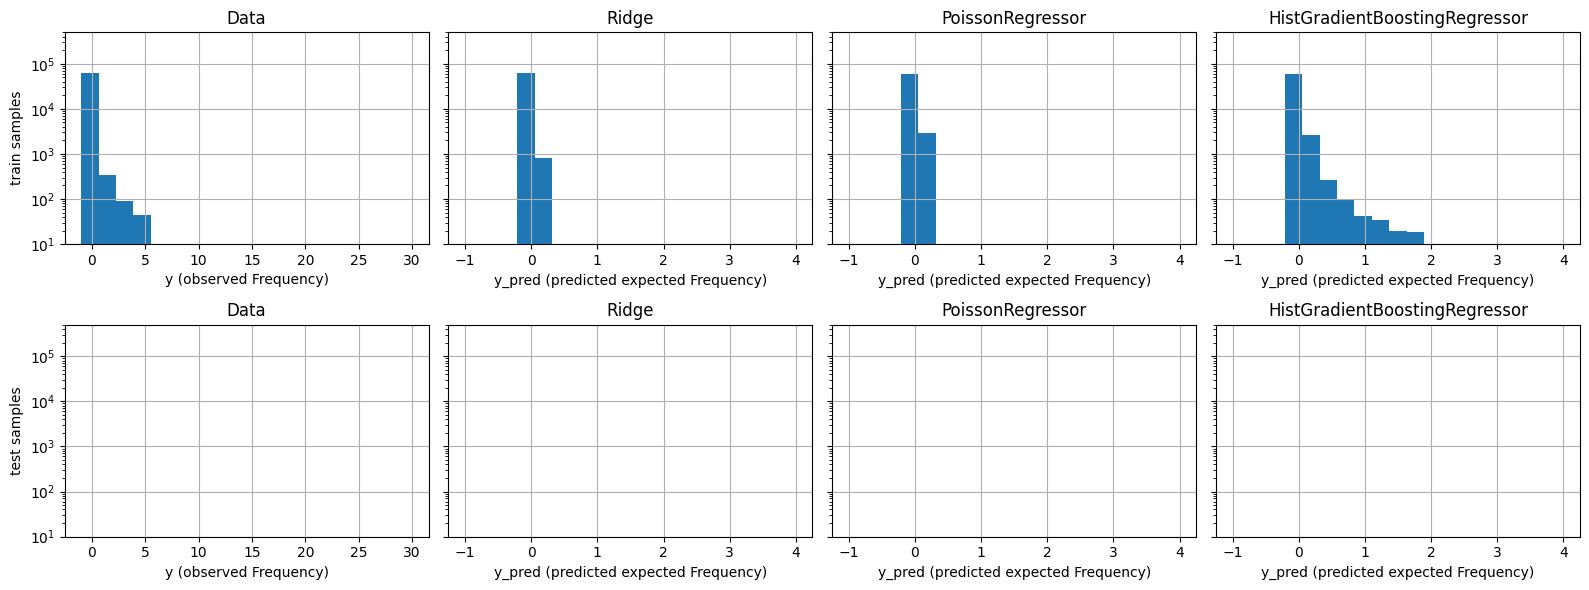

In [ ]:
ig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 6), sharey=True)
fig.subplots_adjust(bottom=0.2)
n_bins = 20
for row_idx, label, nb in zip(range(2), ["train", "test"], [nb_train, nb_test]):
    nb["Frequency"].hist(bins=np.linspace(-1, 30, n_bins), ax=axes[row_idx, 0])

    axes[row_idx, 0].set_title("Data")
    axes[row_idx, 0].set_yscale("log")
    axes[row_idx, 0].set_xlabel("y (observed Frequency)")
    axes[row_idx, 0].set_ylim([1e1, 5e5])
    axes[row_idx, 0].set_ylabel(label + " samples")

    for idx, model in enumerate([ridge_glm, poisson_glm, poisson_gbrt]):
        y_pred = model.predict(nb)

        pd.Series(y_pred).hist(
            bins=np.linspace(-1, 4, n_bins), ax=axes[row_idx, idx + 1]
        )
        axes[row_idx, idx + 1].set(
            title=model[-1].__class__.__name__,
            yscale="log",
            xlabel="y_pred (predicted expected Frequency)",
        )
plt.tight_layout()

Actual number of claims: 0
Predicted number of claims by Ridge(alpha=1e-06): 0.0
Predicted number of claims by PoissonRegressor(alpha=1e-12): 0.0
Predicted number of claims by HistGradientBoostingRegressor(loss='poisson', max_leaf_nodes=128): 0.0
Predicted number of claims by DummyRegressor(): 0.0


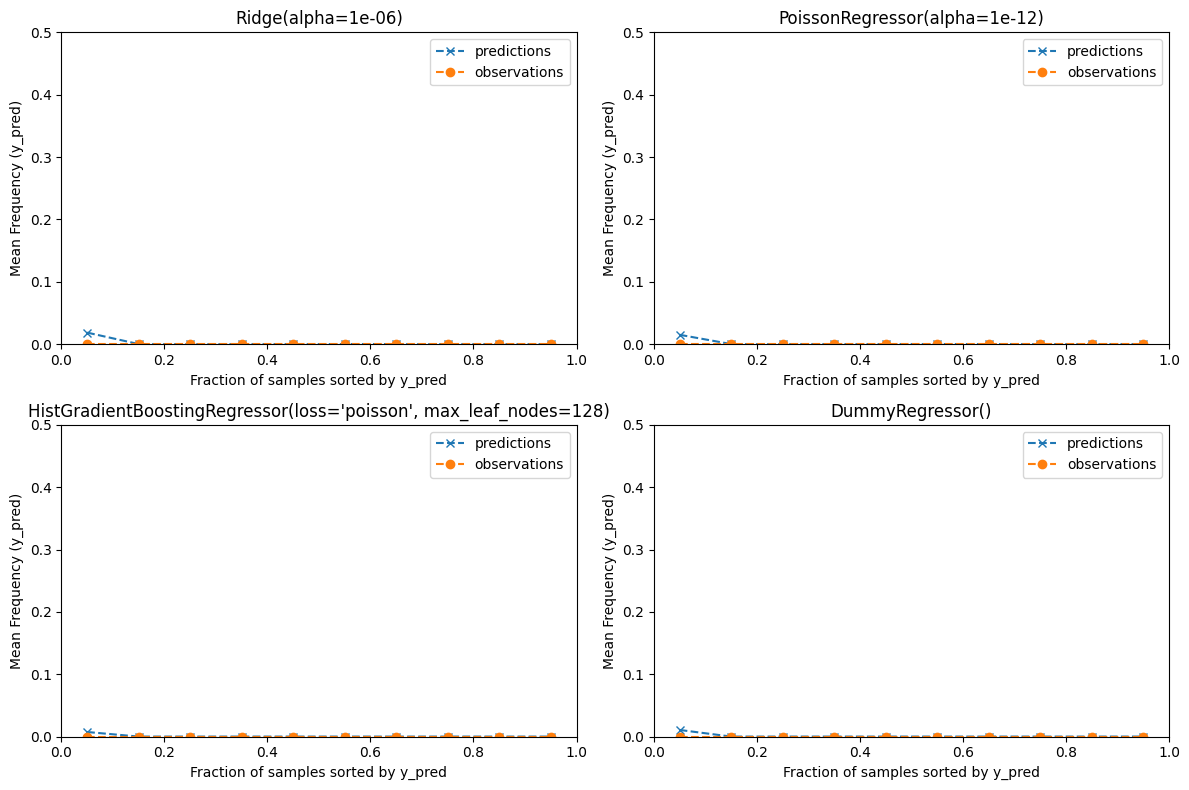

In [ ]:
from sklearn.utils import gen_even_slices


def _mean_frequency_by_risk_group(y_true, y_pred, sample_weight=None, n_bins=100):
    """Compare predictions and observations for bins ordered by y_pred.

    We order the samples by ``y_pred`` and split it in bins.
    In each bin the observed mean is compared with the predicted mean.

    Parameters
    ----------
    y_true: array-like of shape (n_samples,)
        Ground truth (correct) target values.
    y_pred: array-like of shape (n_samples,)
        Estimated target values.
    sample_weight : array-like of shape (n_samples,)
        Sample weights.
    n_bins: int
        Number of bins to use.

    Returns
    -------
    bin_centers: ndarray of shape (n_bins,)
        bin centers
    y_true_bin: ndarray of shape (n_bins,)
        average y_pred for each bin
    y_pred_bin: ndarray of shape (n_bins,)
        average y_pred for each bin
    """
    idx_sort = np.argsort(y_pred)
    bin_centers = np.arange(0, 1, 1 / n_bins) + 0.5 / n_bins
    y_pred_bin = np.zeros(n_bins)
    y_true_bin = np.zeros(n_bins)

    for n, sl in enumerate(gen_even_slices(len(y_true), n_bins)):
        weights = sample_weight[idx_sort][sl]
        y_pred_bin[n] = np.average(y_pred[idx_sort][sl], weights=weights)
        y_true_bin[n] = np.average(y_true[idx_sort][sl], weights=weights)
    return bin_centers, y_true_bin, y_pred_bin


print(f"Actual number of claims: {nb_test['ClaimNb'].sum()}")
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.3)

for axi, model in zip(ax.ravel(), [ridge_glm, poisson_glm, poisson_gbrt, dummy]):
    y_pred = model.predict(nb_test)
    y_true = nb_test["Frequency"].values
    exposure = nb_test["Exposure"].values
    q, y_true_seg, y_pred_seg = _mean_frequency_by_risk_group(
        y_true, y_pred, sample_weight=exposure, n_bins=10
    )

    # Name of the model after the estimator used in the last step of the
    # pipeline.
    print(f"Predicted number of claims by {model[-1]}: {np.sum(y_pred * exposure):.1f}")

    axi.plot(q, y_pred_seg, marker="x", linestyle="--", label="predictions")
    axi.plot(q, y_true_seg, marker="o", linestyle="--", label="observations")
    axi.set_xlim(0, 1.0)
    axi.set_ylim(0, 0.5)
    axi.set(
        title=model[-1],
        xlabel="Fraction of samples sorted by y_pred",
        ylabel="Mean Frequency (y_pred)",
    )
    axi.legend()
plt.tight_layout()

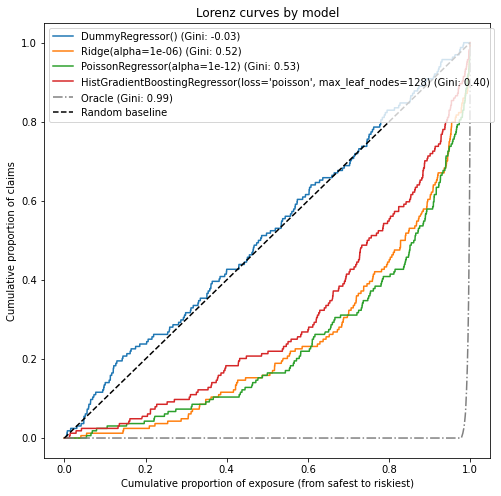

In [ ]:
from sklearn.metrics import auc


def lorenz_curve(y_true, y_pred, exposure):
    y_true, y_pred = np.asarray(y_true), np.asarray(y_pred)
    exposure = np.asarray(exposure)

    # order samples by increasing predicted risk:
    ranking = np.argsort(y_pred)
    ranked_frequencies = y_true[ranking]
    ranked_exposure = exposure[ranking]
    cumulated_claims = np.cumsum(ranked_frequencies * ranked_exposure)
    cumulated_claims /= cumulated_claims[-1]
    cumulated_exposure = np.cumsum(ranked_exposure)
    cumulated_exposure /= cumulated_exposure[-1]
    return cumulated_exposure, cumulated_claims


fig, ax = plt.subplots(figsize=(8, 8))

for model in [dummy, ridge_glm, poisson_glm, poisson_gbrt]:
    y_pred = model.predict(nb_test)
    cum_exposure, cum_claims = lorenz_curve(
        nb_test["Frequency"], y_pred, nb_test["Exposure"]
    )
    gini = 1 - 2 * auc(cum_exposure, cum_claims)
    label = "{} (Gini: {:.2f})".format(model[-1], gini)
    ax.plot(cum_exposure, cum_claims, linestyle="-", label=label)

# Oracle model: y_pred == y_test
cum_exposure, cum_claims = lorenz_curve(
    nb_test["Frequency"], nb_test["Frequency"], nb_test["Exposure"]
)
gini = 1 - 2 * auc(cum_exposure, cum_claims)
label = "Oracle (Gini: {:.2f})".format(gini)
ax.plot(cum_exposure, cum_claims, linestyle="-.", color="gray", label=label)

# Random Baseline
ax.plot([0, 1], [0, 1], linestyle="--", color="black", label="Random baseline")
ax.set(
    title="Lorenz curves by model",
    xlabel="Cumulative proportion of exposure (from safest to riskiest)",
    ylabel="Cumulative proportion of claims",
)
ax.legend(loc="upper left")